# Assignment 1 - Part 2

<div class="alert alert-block alert-warning">
    Below we import <a href="https://github.com/HIPS/autograd">autograd</a>. If you get an error saying you don't have it, you will need to install it with pip, using
<pre>
pip install autograd
</pre>
</div>

In [89]:
import  autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import jacobian, grad

## Newton's Method

We want to approximate solutions of nonlinear equation in __two variables__ using Newton's method.

Newton's method is implemented below.

Implement a stopping criterion. That is, given some tolerance $TOL$, end the method when $\mathbf{x}^k:=(x_1^k,x_2^k)$ satisfies $\|F(\mathbf{x}^k)\|_2\le TOL$ or $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_2\le TOL$.

Provide numerical evidence that your code works as it should by printing the values of $\|F(\mathbf{x}^k)\|_2$ for each iteration, and by making a plot of $\|F(\mathbf{x}^k)\|_2$, $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_2$, for all $k$.

Now, verify numerically the convergence is quadratic. You will need a reference solution, and one can do this in two ways:

 - Consider a problem for which you know an exact solution, and use said solution as a reference solution,
 - or for your problem, should you not know a solution, use the method to obtain an extremely accurate result which you use as a reference solution

In [90]:
def ooc(S):
    """
    Calculation of the order of a convergence of a convergent series.

    --Parameters--
    S: A list of NumPy-arrays
        The input list needs to have at least four elements for the method to succeed.
    
    --Returns--
    A float as the order of convergence of the series, or 0 if the function fails.
    """
    if len(S) >= 4:
        return np.log(np.linalg.norm(S[-2]-S[-1])/np.linalg.norm(S[-3]-S[-1]))/np.log(np.linalg.norm(S[-3]-S[-1])/np.linalg.norm(S[-4]-S[-1]))
    return 0

In [91]:
def newtonsMethod(F, x0, maxIter=1000, TOL=1.0e-20):
    """
    Implementation of Newton's root finding method.
    
    --Parameters--
    F: Function
        Numpy array of shape (2,) as input and output.
        This is the function we wish to find the root for
    x0: Numpy array of shape (2,).
        This is the initial guess for the method.
    maxIter: Integer
        The maximum number of iterations to do.
    TOL: Float
        The level of tolerance for when to stop the search
    """
    DF = jacobian(F) # Calculate the jacobian matrix of our function
    
    # Initialize variables before the for-loop 
    x1 = x0
    A, I, D, S = [], [], [], []
    
    for k in range(0, maxIter):
        x0 = x1
        J = DF(x0)
        Fx = F(x0)
        x1 = x0 - np.linalg.solve(J,Fx)
        A.append(x1)
        I.append(np.linalg.norm(Fx,2))
        D.append(np.linalg.norm(x1-x0,2))
        if ((np.linalg.norm((x1-x0),2)<=TOL) or (np.linalg.norm(x1,2)<=TOL)) and (k > 4): break

    # Creating the error series
    for i in range(len(A)-1):
        S.append(np.linalg.norm(A[i]-A[-1]))

    #print(f"Series:\n{S[-1]/S[-2]**1.2966069431192224}")

    print(f"Order of convergence:\n{ooc(A)}\n")

    print("Evolution of ||F(x)||:")
    plt.figure()
    plt.semilogy(I)
    plt.show()
    print("\n")

    print("Evolution of ||x1-x0||:")
    plt.figure()
    plt.semilogy(D)
    plt.show()
    print("\n")

    print("Evolution of error:")
    plt.figure()
    plt.plot(S)
    plt.show()
    print("\n")

    return x1

Order of convergence:
1.2966069431192224

Evolution of ||F(x)||:


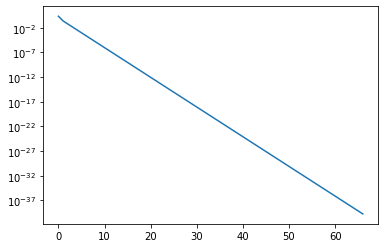



Evolution of ||x1-x0||:


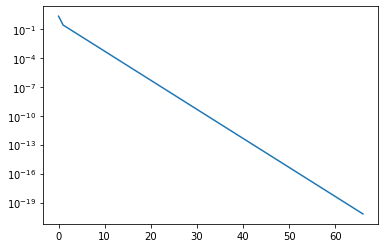



Evolution of error:


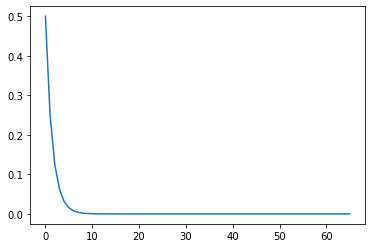



Zero:
[6.77626358e-21 0.00000000e+00]


In [92]:
# Test suite 1
f = lambda v: np.array([v[0]**2,v[1]])
print(f"Zero:\n{newtonsMethod(f, np.array([1.,2.]))}")

Order of convergence:
-0.7998567874935155

Evolution of ||F(x)||:


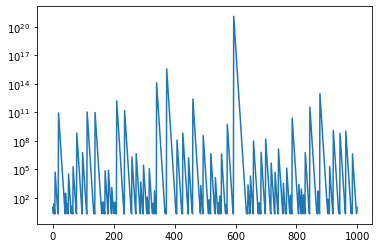



Evolution of ||x1-x0||:


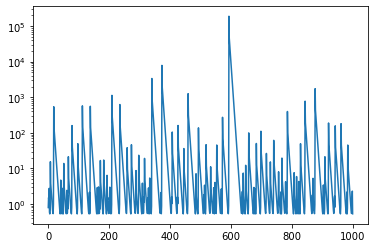



Evolution of error:


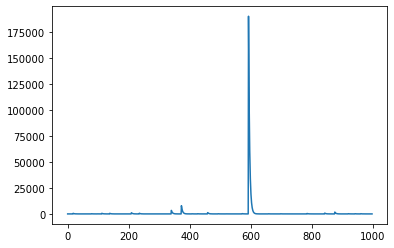



Zero:
[-1.15258796  1.        ]


In [93]:
# Test suite 2
g = lambda v: np.array([v[1]**3+v[0]**4+1.1,v[1]**2-1])
print(f"Zero:\n{newtonsMethod(g,np.array([1.,2.]))}")

## Linear systems

Consider the linear system 
	\begin{equation*}
	A \mathbf{u} = \mathbf{f},
	\end{equation*}
where $A$ is a finite-difference discretization of the 2D Laplacian, this is a block tridiagonal matrix, implemented in the code below, and $\mathbf{f}$ is the vector with all components equal to one.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy import linalg
import time

# Creating the 2D laplacian matrix
def create2DLaplacian(nx, ny):
    N  = nx*ny
    main_diag = np.ones(N)*-4.0
    side_diag = np.ones(N-1)
    side_diag[np.arange(1,N)%4==0] = 0
    up_down_diag = np.ones(N-3)
    diagonals = [main_diag,side_diag,side_diag,up_down_diag,up_down_diag]
    laplacian = sparse.diags(diagonals, [0, -1, 1,nx,-nx])
    return laplacian*np.eye(N)

# Dummy matrix
test = create2DLaplacian(3,3)
print(test)

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  1.  0.  0.  0.]
 [ 1.  0.  1. -4.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -4.  1.  0.  1.]
 [ 0.  0.  0.  1.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0. -4.]]


We will now approximate the solution of this linear system using some different iteration methods of the type 
	\begin{equation*}
		A_1 \mathbf{u}^{(k+1)} = A_2 \mathbf{u}^{(k)}+\mathbf{f},
	\end{equation*}
	where $A = A_1 - A_2$ with $|A_1|\ne0$. The way we choose the matrices $A_1$ and $A_2$ depends upon the method. We will use the following iterative methods to calculate approximate solutions to $\mathbf{u}$:

a) Jacobi ($A_1 = A_d$).

b) Forward Gauss-Seidel ($A_1 = A_d-A_l$).

c) Successive over relaxation ($A_1 = A_d-\omega A_l$, where you can choose the value of $\omega\in (0,1)$).

Here $A = A_d - A_l - A_u$, where

- $A_d$ is the diagonal of $A$,
- $A_l$ is $-$(strictly lower triangular part of $A$),
- $A_u$ is $-$(strictly upper triangular part of $A$).

Consider the residual vector $\mathbf{r}^k:=\mathbf{f}-A\mathbf{u}^k$. We fix $nx=ny=10$ and $N=100$. For each of the above, you should:

i) Compare the convergence of each method. Submit  a semi-log plot of the $2$-norm of the relative residual $\frac{ \|\mathbf{r}^k\|_2 }{ \| \mathbf{r}^0\|_2 }$ versus the number of iterations. Plot all the methods in the same plot for comparison.
Experiment choosing different values of $\omega$ in the SOR method, try to find a value that gives you optimal convergence for this problem.


ii) Implement a stopping criterion for the three methods as you have done for the Newton method. Record the relative time each method takes per iteration, and the rime needed to obtain a norm of the relative residual below toleances  $TOL=1e-7$ and $TOL=1e-14$. Make a table with the results for each method.

iii) Calculate the spectral radius of $A_1^{-1}A_2$ and see how that relates to convergence of the method. Make a semi-log plot for comparison. 

<div class="alert alert-block alert-info">
<b>Hint:</b> Python's 
    <pre>numpy.linalg.eigvals(A)</pre>
function returns the eigenvalues of $A$.
</div>

Note from student:
I realized after creating all of the different methods, that they are all special cases of the last method...

In [95]:
# This is the matrix to use for the final tests
toRun = create2DLaplacian(10,10)
print(toRun)

[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


In [96]:
# I hope the names of these functions are self-explanatory

def extractDiagonal(A):
    return np.diag(np.diag(A))

def extractLower(A):
    return -1*sparse.tril(A,-1)*np.identity(A.shape[0])

def extractUpper(A):
    return -1*sparse.triu(A,1)*np.identity(A.shape[0])

def getSpectralRadius(A):
    return np.linalg.norm(np.linalg.eigvals(A), np.inf)

In [97]:
def generalIteration(A, B, C, f, u0, maxIter, TOL):
    """
    The method of iteration used for the following problems

    --Parameters--
    A: NumPy Matrix
        This is the matrix denoted A
    B: NumPy Matrix
        This is the matrix denoted A1 inverse
    C: NumPy Matrix
        This is the matrix denoted A2
    f: NumPy Array
        f as the f from the problem
    u0: NumPy Array
        Initial guess
    maxIter: Integer
        The maximal iteration depth
    TOL: Float
        The level of tolerance between our approximation and the real solution

    --Returns--
    Returns a tuple of three things:
        1. The sequence created by the iteration
        2. The sequence of residues
        3. A list of time spent per iteration
    """
    # Setting up variables before loop
    u1 = u0
    Iter = [u0]
    TimeIter = []

    totNow = time.time_ns() # Start "total" stopwatch 
    for i in range(maxIter):
        now = time.time_ns() # Start "relative" stopwatch
        u0 = u1
        u1 = B @ (C @ u0 + f) # Calculate next element of sequence
        Iter.append(u1)
        if (np.linalg.norm(A@u1-f) <= TOL) or (np.linalg.norm(u1-u0) <= TOL) : 
            then = time.time_ns() # End "relative" stopwatch
            TimeIter.append(then-now) # Add time taken to list
            break
        then = time.time_ns() # End "relative" stopwatch
        TimeIter.append(then-now) # Add time taken to list
    totThen = time.time_ns() # End "global" stopwatch

    return (Iter, list(map(lambda x: f - A@x, Iter)), TimeIter, totThen - totNow)

In [98]:
def jacobiMeth(A, f, u0, maxIter = 50, TOL = 1e-10, *args):
    """
    Implementation of Jacobis Method

    --Parameters--
    A: NumPy Matrix
        The A matrix from the problem
    f: NumPy Array
        The f vector from the problem
    u0: NumPy Array
        Initial guess
    maxIter: Integer
        Maximal iteration depth
    TOL: Float
        Level of Tolerance
    *args: A hack
        Has no purpose in this function, only to make another function function

    --Returns--
    Returns the arguments from the generalIteration function
    """
    # Initializing problem
    inv = lambda x: 1/x 
    A1Inv = np.diag(inv(np.diag(A))) # Since I know that A1 is diagonal, the inverse is quite easy to calculate
    A2 = extractDiagonal(A) - A

    specRad = getSpectralRadius(A1Inv@A2)
    (out, res, relTimeIt, totTimeIt) = generalIteration(A, A1Inv, A2, f, u0, maxIter, TOL)

    return (out, res, relTimeIt, totTimeIt, specRad)

In [99]:
def ForwardGSMeth(A, f, u0, maxIter = 50, TOL = 1e-10, *args):
    """
    Implementation of Forward Gauss-Seidel Method

    --Parameters--
    A: NumPy Matrix
        The A matrix from the problem
    f: NumPy Array
        The f vector from the problem
    u0: NumPy Array
        Initial guess
    maxIter: Integer
        Maximal iteration depth
    TOL: Float
        Level of Tolerance
    *args: A hack
        Has no purpose in this function, only to make another function function

    --Returns--
    Returns the arguments from the generalIteration function
    """
    # Initialize problem
    A1Inv = np.linalg.inv(extractDiagonal(A) - extractLower(A))
    A2 = extractUpper(A)

    specRad = getSpectralRadius(A1Inv @ A2)
    (out, res, relTimeIt, totTimeIt) = generalIteration(A, A1Inv, A2, f, u0, maxIter, TOL)

    return (out, res, relTimeIt, totTimeIt, specRad)

In [100]:
def SuccessOverRelaxMeth(A, f, u0, maxIter = 50, TOL = 1e-10, *args):
    """
    Implementation of the Success over relaxation Method

    --Parameters--
    A: NumPy Matrix
        The A matrix from the problem
    f: NumPy Array
        The f vector from the problem
    u0: NumPy Array
        Initial guess
    maxIter: Integer
        Maximal iteration depth
    TOL: Float
        Level of Tolerance
    *args: A hack
        The first element of args is assigned to be w. If no element has been provided, fall back to 0.5

    --Returns--
    Returns the arguments from the generalIteration function
    """
    # Initialize problem
    if len(list(args)) == 0:
        w = 0.5
    else:
        w = args[0]
    print(w)
    A1Inv = np.linalg.inv(extractDiagonal(A) - w*extractLower(A))
    A2 = (1-w)*extractLower(A) + extractUpper(A)

    specRad = getSpectralRadius(A1Inv @ A2)
    (out, res, relTimeIt, totTimeIt) = generalIteration(A, A1Inv, A2, f, u0, maxIter, TOL)

    return (out, res, relTimeIt, totTimeIt, specRad)

In [101]:
def randomVec(n, reach):
    """
    Creating a random vector

    --Parameters--
    n: Integer
        Dimension of the vector
    reach: Float
        the values of each element in the vector is within the interval (-reach,reach)

    --Returns--
    Returns a vector of dimension n with random entries.
    """
    np.random.seed()
    v = np.random.rand(n)
    trans = lambda x: 2*reach*(x-1/2)
    return trans(v)

In [106]:
def testIteration(Iterative, A = test, f = randomVec(9, 10), u0 = randomVec(9, 10), maxIter = 50, TOL = 1e-10, *args):
    """
    Implementation of a random test generator

    --Parameters--
    Iterative: Function
        This is which iteration method as defined above should be used
    A: NumPy Matrix
        The matrix given as A
    f: NumPy Array
        The f vector from the problem
    u0: NumPy Array
        Initial guess
    maxIter: Integer
        Maximal iteration depth
    TOL: Float
        Level of Tolerance
    *args: A hack

    --Returns--
    Returns a tuple of four things:
        1. The order of convergence
        2. The average iteration time
        3. the average norm-calculation time
        4. The level of tolerance
    """
    (out, res, relTimeIt, totTimeIt, specRad) = Iterative(A, f, u0, maxIter, TOL, *args)

    print(f"u0:\n{u0}")
    print(f"f:\n{f}")
    print(f"Solution:\n{out[-1]}")

    diffRes = []
    diffTime = []

    totNow = time.time_ns() # Start "total" stopwatch
    
    for x in res:
        relRes.append(np.linalg.norm(x)/np.linalg.norm(res[0]))
    #plt.semilogx(relRes)

    totThen = time.time_ns() #
        relRes.append(np.linalg.norm(x)/np.linalg.norm(res[0])) Stop "total" stopwa
    #plt.semilogx(relRes)t
ch
  

    #plt.semilogx(relRes) 
   #plt.semilogx(relRes) 
 totDiffTime = totThe
    to
    totThen = time.time_ns() # Stop "total" stopwatchtThen = time.time_ns() # Stop "tota
    totDiffTime = totThen - totNowl
" stopwatchn - totNow

    for i in ra
    for i in range(1, len(relRes)-1):nge(1,
 
    totDiffTime = totThen - totNow 
  totThen = time.
        diffRes.append(np.log(relRes[i+1])/np.log(relRes[i]))time_ns() # Stop "tot
    for i in range(1, len(relRes)-1):al" stopwatch len(relRes)-1):
        now = time
    totDiffTi
        diffRes.append(np.log(relRes[i+1])/np.log(relRes[i]))me = totThen - totNow.
time_ns() # Start "relative" stopwatch
    for i in range(1, len(relRes)-1):
        diffRes.append(np.log(relRes[i+1])/np.log(relRes[i]))
        then = time.time_ns() # Stop "relative" stopwatch
        diffTime.append(then-now)

    
    print(len(relRes))
    print(totNow)
    print(totThen)
    print(totDiffTime)

    avgItTime = sum(relTimeIt)/len(relTimeIt)
    avgDiffTime = sum(diffTime)/len(diffTime)



    print(f"Rate of convergence:\n{diffRes[-1]}")

    return (diffRes[-1], avgItTime/totTimeIt, avgDiffTime/totDiffTime, TOL)

In [107]:
testIteration(jacobiMeth, A = toRun, f = randomVec(100, 10), u0 = randomVec(100, 10), maxIter = 1000)

u0:
[-2.41726279e-01 -7.60120540e+00  8.10622155e+00  5.31102074e+00
  4.77450092e+00 -8.78119053e+00  2.99363500e+00 -2.37556276e+00
  4.86179839e+00 -7.24207085e+00 -3.10820727e+00  4.62245937e+00
 -7.85889137e+00 -1.38109436e+00 -5.45680893e+00 -5.82737106e-01
 -4.43267824e+00 -2.10232522e+00 -2.62857626e+00  2.63125859e+00
  2.66507436e+00  7.89541447e+00  3.92205530e+00  5.99337002e+00
  4.76361665e+00 -2.55065989e+00 -2.99569739e-01 -4.92925175e+00
  2.94089228e+00  6.05277417e+00 -9.26175161e+00 -9.54134588e+00
  2.60128188e+00 -5.62071585e+00 -8.90214494e+00  4.26955823e+00
 -3.76699564e+00  5.94728056e+00  1.10880490e+00  2.48768587e+00
 -8.76618730e-01 -2.35219162e+00  4.50506274e+00  6.09688737e+00
  7.41135003e+00 -1.75964805e+00  5.71574580e+00 -5.36126669e+00
  3.76389579e+00  7.76385466e-01 -1.37900756e+00 -5.59709700e-01
 -5.82510090e+00 -9.40561346e+00 -9.42871360e+00 -1.32694105e+00
  4.59507011e+00 -8.85681918e+00 -6.99858747e+00  2.79725339e+00
 -4.21311446e+00  4.9

(1.0054126768260543, 0.006024096385542169, 0.0017206784330072002, 1e-10)

In [108]:
testIteration(ForwardGSMeth, A = toRun, f = randomVec(100, 10), u0 = randomVec(100, 10), maxIter = 1000)

u0:
[-5.42665873  3.08192283  9.80302762  5.93305578 -2.70899024  5.5714536
  7.1804858  -8.8654799  -8.25780303 -5.5866451   8.89247558 -5.67537359
  0.37745205 -2.33574621  8.02016106  6.02353046 -9.82439724  6.517911
 -3.12688765 -0.53156032  4.42942385 -2.6076839   6.74886626  6.41174908
  1.79431259  6.49981476 -0.83426609  4.94243756 -0.41676844  2.83672073
  7.7013615  -6.64192965 -2.1964728   3.74329173  7.03694322 -6.57615566
  3.57081431  7.54710749  6.05695521  7.9058891   9.49839937  2.90101235
 -4.61108586 -7.83405891  8.81977689  5.8047108  -0.51367003 -4.34889271
 -1.11315729 -4.09529511 -4.60957262  9.49139821  8.00873378  4.83614538
  4.69499078  1.67234414 -7.45053882 -8.25997241  2.95883171 -3.68435884
  8.2858379  -1.10046194  9.34069115 -8.27765696  9.9335496  -7.5302298
 -7.51832767 -6.78253435 -4.95653816 -6.77404579  3.63878684  7.32021638
  1.41787766  6.85745712  2.41160698  3.70087597  2.22482936 -4.24129827
  4.85930305 -0.74565228  2.99537101 -0.7839731   3

(1.0102958627389447, 0.01408450704225352, 0.0, 1e-10)

In [109]:
testIteration(SuccessOverRelaxMeth, test, np.random.rand(9), np.random.rand(9), 50, 1e-10, 0.1)

0.1
u0:
[0.70879296 0.47289867 0.37382527 0.02712755 0.97837108 0.28945099
 0.36110045 0.70102809 0.02697518]
f:
[0.56466328 0.55599533 0.60435841 0.08292395 0.2521101  0.30265423
 0.76985805 0.34123386 0.28350914]
Solution:
[-0.327876   -0.41923829 -0.44582625 -0.32760246 -0.34725563 -0.43210587
 -0.45378365 -0.28556828 -0.17890375]
51
1581519239665426700
1581519239669426300
3999600
Rate of convergence:
1.0196822846745328


(1.0196822846745328, 0.02, 0.0, 1e-10)